# Proposal for the new GAGG:Ce crystal irradiation campaign

The analysis of the data acquired during the previous irradiation campaign has shown several limitations that interfered negatively with the radiation induced luminescence modeling in the GAGG:Ce crystals.

The experience gained through the data analysis has also shown ways to improve both the setup and the parameters of the irradiation steps to maximize the understanding of the crystal luminescence.

Unfortunately, due to the limited amount of time that can be allocated for this purpose at the irradiation facility, even a carefully planned campaign is largely insufficient to gain a complete understanding. This is true mainly because of two factors:
1. There are several  metastable states (charge carrier traps), and the range of their mean lifetimes span several orders of magnitude.
2. Radiation damage may introduce new metastable states or alter existing ones, changing the picture while it is acquired.

Utmost importance should be given to thorough testing of the crystals with illumination runs both before and after the irradiation campaign to precisely establish their luminescence properties and how they change because of radiation damage. Accurate characterizations are fundamental in understanding the irradiation measurements.

This proposal is based on a full week of data taking, starting on a Monday, with irradiations performed on six days (evenings of Monday to Friday, and Saturday morning). Since at this moment the effect of radiation damage is not clear yet, calculations are based on a simple luminescence model with constant trap parameters. The value of the parameters are taken from the results of the previous analysis.


## Simplified luminescence model

Luminescence is a phenomenon due to the entrapment of free charge carriers, liberated by ionization of the crystal due to impinging radiation, into metastable states. These charge carriers are successively emitted by one or more mechanisms (thermal energy absorption, direct tunneling to the luminescence centers, thermally assisted tunneling). The measurements performed within this kinds of experiments do not allow for the distinction of the sign of the trapped charge carriers (electrons or holes).

A simplified model of luminescence can be obtained if the traps (of all kinds) are uniformely distributed within the crystal volume, and if their density is high with respect to the density of the charge carriers, but low with respect to the density of the radiative recombination centers. This simplified model is capable of describing the luminescence induced by irradiation of the crystal with light (illumination), and also with more energetic radiation (X- and $\gamma$-rays, charged particles), provided the radiation flux is not too high, and radiation damage can be neglected.

The charge carriers liberated by ionization move around the crystal until they recombine (highest probability) or get trapped. The time scale of these processes is much smaller than that of the luminescence we are interested in, so we may neglect all the details and just speak of the probability for a charge carrier either to recombine or to get trapped into a particular kind of metastable state. Since the number of freed  carriers is large both when the crystal is illuminated by light and when it is irradiated with protons with energy in the tens of MeV, we can use average values and treat the problem in the continuous limit.

Considering the i-th trap species, the probability for a charge carrier to be trapped into one of these traps is proportional to the volume integral of the product between the capture probability $\pi_i$ of that trap species and its density $d_i$:
\begin{align}
  \Pi_i \propto \int_V \pi_i \cdot d_i \cdot dV,
\end{align}

the volume V being that spanned charge carriers from generation to trapping or recombination.

This is true for all the $N_T$ trap species we are interested in, and also for both the traps with faster emission rates and the recombination centers that, for semplicity, we cluster into a single index r. Since all the charge carriers undergo recombination or trapping, we have
\begin{align}
  \Pi_i = \int_V \frac{\pi_i \cdot d_i}{\pi_r \cdot d_r + \sum_{j=1}^{N_T} \pi_j \cdot d_j} dV
\end{align}

If the density of charge carrier is much lower than the densities of the traps and the recombination centers, then on a first approximation we may consider these probabilities constant in space and time. Furthermore, since the protons in the beam have a well defined energy, on average they liberate always the same amount of charge carriers. We can multiply this number by the trapping probabilities and simply use, in our calculations, the number of carriers that get trapped by the i-th trap species for each incident proton:
\begin{align}
  n_i = N_c \cdot \Pi_i.
\end{align}

This argument allows for a big simplification because we don't need to know the values of the probabilities $\Pi_i$ and the total (average) number of charge carriers liberated by a proton. Then, the validity of our assumptions is guaranteed if the values we find for $n_i$ are much smaller than the light yield of the crystal multiplied by the proton kinetic energy, and if we measure a linear luminescence response of the crystal when subject to different fluences (amounts of irradiation).

If the assumptions are met, then the probability of charge carreier retrapping is very small and we can treat each trap species indipendently from the others.

Considering now the i-th trap species, the number of occupied traps $N_i$ during the j-th irradiation step with flux $\phi_j$, integrated on the exposed crystal surface, can be obtained by solving the following differential equation:

\begin{align}
  \frac{dN_i}{dt} = n_i\phi_j-\frac{N_i}{\tau_i}
\end{align}

which has the general solution
\begin{align}
  N_i(t) = N_{i,j0}e^{-t/\tau_i}+n_i\tau_i\phi_j(1-e^{-t/\tau_i}).
\end{align}

In these equations $\tau_i$ is the mean lifetime of the charge carriers in this trap species, and $N_{i,j0}$ is the number of traps already occupied at the beginning of the irradiation.

At the end of the irradiation, after a time $T_j$, the number of occupied traps is equal to

\begin{align}
  N_{i,j} = N_{i,j0}e^{-T_j\,/\tau_i}+n_i\tau_i\phi_j(1-e^{-T_j\,/\tau_i})
\end{align}

and it decays according to an exponential law

\begin{align}
  N_i(t) = N_{i,j}e^{-t/\tau_i}
\end{align}

where the time $t$ is counted from the irradiation end.

The component of the current measured at the sensors (PMT and SDD cells) due to the j-th irradiation is caused by the light produced by the emission of the previously trapped charge carriers and their subsequent recombination, thus

\begin{align}
  I_i(t) \propto -\frac{dN_i}{dt} = \left[\frac{N_{i,j0}}{\tau_i}e^{-T_j\,/\tau_i}+n_i\phi_j(1-e^{-T_j\,/\tau_i})\right]e^{-t/\tau_i}
\end{align}

The multiplicative factors not indicated in the equation are the elementary charge, the efficiency of transport of the photons to the sensors, their quantum efficiency and, for the PMT, its gain.

Usually there are no or very few occupied traps of the species with short mean lifetimes at the beginning of the first irradiation, while the initial number of occupied traps of the other species can be obrained by measuring for a sufficiently long interval of time the luminescence of the crystal before irradiating it.

In the code, $n_i$ and $\tau_i$ are indicated with `n[i]` and `tau[i]`.


## Irradiation strategy

There are basically two ways, and their mixtures, to reach a desired total fluence by several, intermediate, and nonuniform steps in an irradiation campaign:
1. with fixed irradiation duration increase progressively the particle flux;
2. with fixed particle flux increase progressively the irradiation duration.

The trouble with the first option is that the fit of a sum of exponential decays is known to be an ill conditioned problem. Another thing to consider is that by increasing the flux beyond a certain (not yet known) value the assumptions used in the simplified model previously described cease to be valid.
With the second option, instead, the decaying exponentials are multiplied by the factor
\begin{align}
  1-e^{-T_j\,/\tau_i}
\end{align}
so that by sweeping $T_j$ the ratios of the comonents of the light curves due to different trap species change from irradiation to irradiation and the fit problem is eased somehow. By carefully choosing the irradiation durations $T_j$ one can maximize the accurcy of the luminescence model.

Unfortunately, as already stated before, in the irradiation campaign there will not be enough time to implement the optimum irradiation scheme, and one has to rely upon extensive illumination measurements, based on the same philosophy, prior to the irradiation campaign. These tests should be repeated after the campaign to assess the eventual radiation damage suffered by the crystal.

## Proton flux

An important parameter to be determined for the irradiation campaign is the proton flux. The flux must not be so high to violate the assumptions on which the luminescence model is based, it should be at least comparable to the highest flux expected in orbit, and it must be large enough to be able to reach the desired total fluence.

One lesson learned from the previous irradiation campaign is that we need a better determination of the actual flux intercepted by the crystal during the different exposures to the beam. This is not an easy task, especially if the beam is collimated
and there is no way to count the particles after the collimator.
To solve this problem we can use the SDD cells to read the scintillation light during the irradiations.

To be able to synchronously read both the SDD cells and the PMT, and also dynamically bias the PMT or at least to turn it on/off during the irradiations, we chose to employ the tetrAMM 4-channel picoammeter. This instrument has two dynamic ranges, one suitable for the PMT ($I_{MAX}$ = 120 $\mu$A) and one adapted to semiconductor sensors ($I_{MAX}$ = 120 nA). We can set the flux so that the scintillation light induces a current of, say, 2/3 of $I_{MAX}$ so as to have some margin in avoiding saturation of the instrument.

In this calculation we assume that the collimator has a radius of 5 mm, we use the $\gamma$-ray light yield of the previous crystals, and the ratio between beam current and monitor measurements from the previous irradiations to estimate the required extraction current in the new campaign.


In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as spc
import scipy.stats as stat
from IPython.display import display, Markdown
import GAGGafterglow as ga

plt.rcParams.update({'font.size': 14})

MeV = 1000.        # energy unit, keV
Ep = 70.*MeV       # kinetic energy of the protons
LY = 53.           # light yield of the crystal, photons/keV
Np = Ep*LY         # number of shintillation photons produced by a proton
SDD_coupling = 0.25 # coupling efficiency to the crystal for an SDD cell
SDD_eff = .8       # quantum efficiency of the SDD cell for light in the GAGG emission spectrum
Ip = SDD_coupling*SDD_eff*spc.elementary_charge*Np # current produced on an SDD cell by a 1 s⁻¹ proton flux
nA = 1e-9          # current unit, A
Imax = 120*nA      # maximum measurable current
safe = 2/3         # safety factor to avoid instrument saturation
phi_coll = safe*Imax/Ip

beam_std = .69     # standard deviation of the beam profile, cm
coll_radius = .25  # radius of the collimated beam, cm
k = coll_radius/beam_std
beam_fraction = stat.norm.cdf(.5+k, 0., 1.)-stat.norm.cdf(.5, 0., 1.)
phi = phi_coll/beam_fraction # flux before the collimator
Phi_step1 = 2.31e8 # fluence of the first step in the previous campaign (monitor)
Ti_step1 = 90      # duration of the first step in the previous campaign
phi_step1 = Phi_step1/Ti_step1 # flux of the first step in the previous campaign
beam_current = 1.*phi/phi_step1

print('Proton flux after the collimator = {:.2e} cm⁻²s⁻¹'.format(phi_coll/(np.pi*coll_radius**2)))
print('Surface integral of the proton flux after the collimator = {:.2e} s⁻¹'.format(phi_coll))
print('Required beam current = {:.2} nA'.format(beam_current))


Proton flux after the collimator = 3.43e+06 cm⁻²s⁻¹
Surface integral of the proton flux after the collimator = 6.73e+05 s⁻¹
Required beam current = 2.3 nA


This calculation assumes that the SDD efficiency is 80%, and tha all the kinetic energy of the protons is lost to ionization.
We know that some of the proton energy is not spent in ionizing thr crystal, and it is expected that the crystal light yield should be a little bit less because of larger direct recombination of electron-hole pairs in the regions of the proton track with higher ionization rate. For this reason the flux could be a little bit higher than this.

This measurement needs to be calibrated. This can be accomplished by measuring the ratio of the signals seen at the SDD cells with that seen by the PMT, and by making a spectrum of the energy deposited by the protons with the PMT in the "dark" operating mode of the beamline. To do so, however, the PMT output should be split into a current measurement path (to the tetrAMM instrument) and a pulse measurement path (to a digitizer). This splitting should be present during the whole campaign, not just during the measurement of the proton signal, so as to keep the system in a consistent state throughout the whole measurement period.

The stability of the PMT signal splitting should be checked beforehand with a $\gamma$-ray source after different exposures of the crystal to illumination.


## Combined SDD/PMT measurements

Unfortunately, the SDD cells we are going to use have a leakage current of some tens of pA, let's say 50 pA. This current puts severe limits on the range of light output from the crystal that can be measured accurately by both the SDD cells and the PMT.

Infact, considering a quantum efficiency of 80% for the entrance window of the SDD, 6% for the PMT photocathode, a 60% efficiency in bringing the light to the PMT, a PMT gain of 10$^6$, then a signal on the SDD with an amplitude equivalent to its leakage current corresponds to a PMT anode current as in the following calculation.


In [3]:
pA = 1e-3       # current unit, nA
uA = 1e3        # current unit, nA
PMT_gain = 1e6
PMT_eff = .06
LG_eff = .6

Isdd = 50*pA
Ipmt = (2*Isdd/SDD_eff)*LG_eff*PMT_eff*PMT_gain

display(Markdown(r'I$_P$$_M$$_T$ = {} $\mu$A'.format(Ipmt/uA)))

I$_P$$_M$$_T$ = 4.5 $\mu$A

To be sure to stay within the linear region of the PMT, its anode current should not exceed 25 $\mu$A. For this reason a complete measurement (i.e. with both sensors active) is possible only when the current of an SDD cell is lower than about 330 pA.
Due to the fluctuations in the current of the SDD cells, it becomes increasely difficult to measure luminescence induced currents below the dark current level. Probably the limit will be close to half this value, so the compete measurement range will span only about an order of magnitude.

To be able to reach this measurement range, however, we have to consider the time it takes to turn on the PMT. By measuring the slope of the light curve, then, we can determine at which higher SDD cell current to switch on the PMT (via an automatic command to the tetrAMM HV module) in such a way that when it is at the desired bias voltage the anode current is about 25 $\mu$A.

As an additional comment, the above calculation shows that for irradiation levels comparable to the first three (or even four) runs of the previous campaign the SDD cells will not be able do make reliable luminescence measurements together with the PMT.


## Irradiation steps

As stated before, the goal of the campaign is to determine the trapping capabilities of the several metastable states due to the defects or contaminants present within the crystal lattice.

At the time of writing this note we don't have a clear picture of the traps in the crystal that will be the subject of the campaign. For this reason we use the information that we have been able to extract from the data of the previous campaign.

To be able to reliably find the mean lifetimes of the traps we need to make several measurements with different contribution from each trap species. As a first step we determine the useful range for the duration of the irradiations in comparison with the mean lifetime of a specific trap species, i.e. as a function of $T_j\,/\tau_i$.

Text(0, 0.5, 'Fractional contribution')

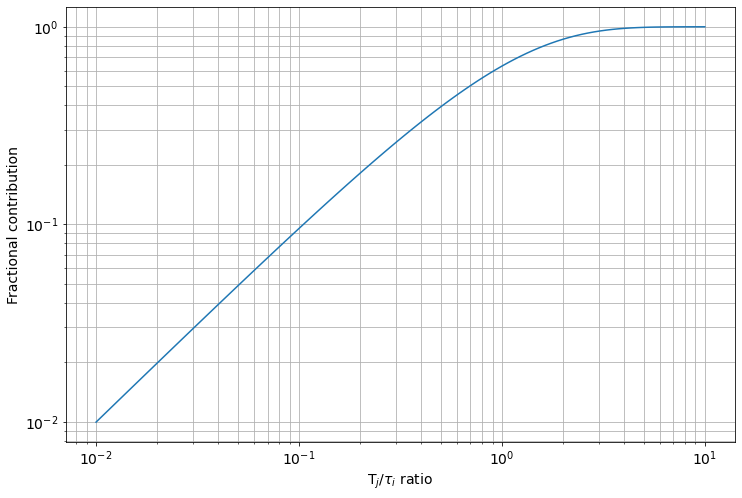

In [4]:
x = np.logspace(-2, 1, 100)
y = 1.-np.exp(-x)

plt.figure(figsize=(12, 8))
plt.loglog()
plt.plot(x, y)
plt.grid(True, which='both')
plt.xlabel(r'T$_j$/$\tau_i$ ratio')
plt.ylabel('Fractional contribution')


As expected, when the duration of an irradiation gets longer than the mean lifetime of a trap species, its contribution to luminescence saturates quickly. On the other side, for low T$_j$/$\tau_i$ ratios the contribution of the trap species increases linearly with the duration of the irradiation, but very small ratios are not acceptable because the absolute amplitude of the contribution of this trap species becomes rapidly negligible in comparison with the contribution of other trap species, so that no information can be retrived for this trap species from the analysis of the light curve.

For the trap spesies with the shortest mean lifetime we will have several measurements all with the same (maximum) contribution, so we need al least two measurement points with the T$_j$/$\tau_i$ ratio in the range [0.1, 0.7] (possibly at the limits).

Fot the trap species with the largest mean lifetime, instead, we will not be able to reach saturation, as it would require almost an entire day of irradiation. To being able to measure this trap species accurately, then, we need an irradiation with T$_j$/$\tau_i$ > 0.1. The duration of a single irradiation is limited by the maximum amount of continuous beam operation available at the facility (hoping one doesn't incur in unexpected interruptions).

For each trap species, but the last one, we require at least three measurements, two with T$_j$/$\tau_i$ $\in$ [0.1, 0.7], and one with T$_j$/$\tau_i$ > 1. This is the minimum useful set of irradiation durations.


irradiation durations
[2, 7, 17, 19, 30, 48, 67, 82, 134, 212, 229, 469, 803, 804, 1487, 2549, 5620, 9634]

merged irradiation durations
[2, 7, 18, 30, 48, 67, 82, 130, 220, 470, 800, 1500, 2500, 5600, 9600]

total fluence = 1.42e+10 protons (74.2% of J2)

data 20210101_200000 loaded
data 20210101_200000 loaded
[True, True, True, True, True, True, True, True, True, False, False, False, False, False, False]


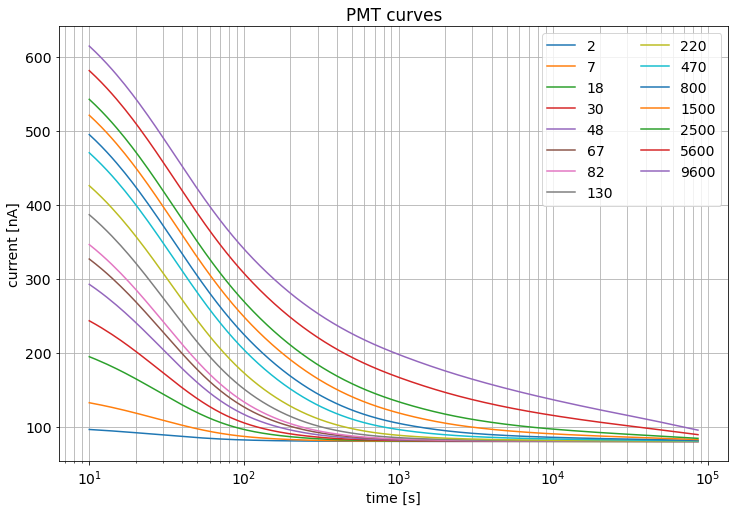

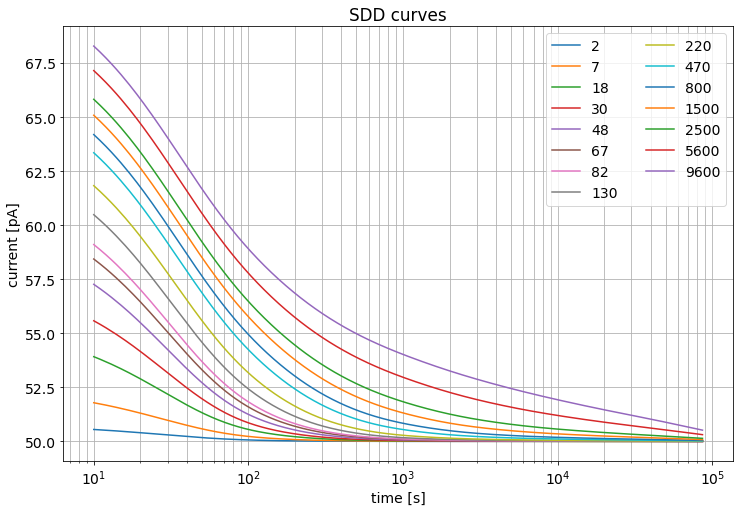

In [5]:
J2_Phi_int = np.empty(6, dtype=float) # J2 irradiation fluences
J2_Phi_int[0] = 1.19e8
J2_Phi_int[1] = 1.20e8
J2_Phi_int[2] = 3.56e8
J2_Phi_int[3] = 1.37e9
J2_Phi_int[4] = 1.95e9
J2_Phi_int[5] = 1.52e10
J2_Phi_tot = J2_Phi_int.sum()               # total J2 fluence

tau = np.array([24.69, 68.21, 191.1, 670, 2124, 8028, 6.91e+04]) # trap data from J2
n = np.array([205.3, 127.7, 99.56, 50.11, 36.7, 48.71, 407.7])

r = np.array([0.1, 0.7, 1.2])

Tj = np.sort(np.array(np.round(np.outer(r, tau[:-1]).flatten()), dtype=int))

print('irradiation durations')
print(Tj.tolist())

# merge values within 20%
Ti = []
i = 0
j = 1
while i < len(Tj):
    idx = ((Tj >= 1.*Tj[i])*(Tj <= 1.2*Tj[i])).nonzero()[0]
    Tm = Tj[idx].mean()
    Ti.append(int(np.round(Tm, 1-int(np.log10(Tm)))))
    i = idx.max()+1

print()
print('merged irradiation durations')
print(Ti)

print()
Phi_tot = phi_coll*np.array(Ti).sum()
print('total fluence = {:.2e} protons ({:.1f}% of J2)'.format(Phi_tot, 100.*Phi_tot/J2_Phi_tot))
print()

# let'see the corresponding light curves as measured by the PMT and an SDD cell
bias = 1500.
A = 6.80988e-3
b = .5962
nd = 10
d = 0.
Io = 3e6
sf = .1
ns = 3.
Tm = 10.                      # measurement delay
Tm_err_neg = -6.
Tm_err_pos = 6.
PMT_scale = 1e9
PMT_Ib = 80.
SDD_scale = 1e12
SDD_Ib = 50

PMT = ga.gagg(bias, A, b, nd, d, Io, sf, ns, PMT_eff, LG_eff/2./2., Tm_err_neg, Tm_err_pos, PMT_scale)
SDD = ga.gagg(1., 1., 0., 0., d, Io, sf, ns, SDD_eff, .4, Tm_err_neg, Tm_err_pos, SDD_scale)

for i in range(len(Ti)):
    if i == 0:
        PMT.load_measure('20210101_200000', Ti[i], Tm, phi_coll, 0.)
        PMT.data[-1][-1]['t'] = Tm+np.arange(24*3600, dtype=float)
        SDD.load_measure('20210101_200000', Ti[i], Tm, phi_coll, 0.)
        SDD.data[-1][-1]['t'] = Tm+np.arange(24*3600, dtype=float)
    else:
        PMT.Ti[-1] = Ti[i]
        SDD.Ti[-1] = Ti[i]
    PMT.simulate(tau, n, Ib=PMT_Ib)
    SDD.simulate(tau, n, Ib=SDD_Ib)
    if i == 0:
        PMT_curves = PMT.get_data('s', 't')
        SDD_curves = SDD.get_data('s', 't')
    else:
        PMT_curves = np.c_[PMT_curves, PMT.get_data('s', 't')]
        SDD_curves = np.c_[SDD_curves, SDD.get_data('s', 't')]

t = PMT.get_time()

plt.figure(figsize=(12, 8))
plt.semilogx()
for i in range(len(Ti)):
    plt.plot(t, PMT_curves[:, i], label=str(Ti[i]))
plt.grid(True, which='both')
plt.legend(ncol=2)
plt.title('PMT curves')
plt.xlabel('time [s]')
plt.ylabel('current [nA]')

plt.figure(figsize=(12, 8))
plt.semilogx()
for i in range(len(Ti)):
    plt.plot(t, SDD_curves[:, i], label=str(Ti[i]))
plt.grid(True, which='both')
plt.legend(ncol=2)
plt.title('SDD curves')
plt.xlabel('time [s]')
plt.ylabel('current [pA]')

print((PMT_curves[1000, :] < PMT_Ib+10.).tolist())


With the calculated irradiation plan we will reach a total fluence slightly lower than 3/4 of that absorbed by the J2 crystal during the previous irradiation campaign.

The choice of keeping the same flux for all the irradiations, while subsequently increasing the duration of the irradiations, has the effect of reducing the light emitted by the crystal during measurement. The plots above show the currents measured starting 10 s after the end of each irradiation: the current measured on the PMT channel of the tetrAMM is always below about 600 nA (due to the split the anode current is twice the measured values). Of course this prediction underestimates the real situation because of the presence of previously undetected trap species with mean lifetimes lower than few seconds. Nevertheless, the chosen irradiation strategy allows to turn on the PMT well before the 60 s used in the previous campaign.

The PMT plot shows that the measured currents after 1000 s on the first nine irradiations is within 10 nA of the PMT dark current, while the maximum duration of an irradiation is 2h 40m, so one can distribute all the planned irradiations within the available time in a week long campaign. One can even repeat a given short irradiation each day to increase the evidence of radiation damage effects on the crystal.


## Irradiation procedure proposal

Given the previous predictions on the irradiation steps, we can decide to measure continuously with the PMT for 1000 s between successive irradiations for the first nine steps, to irradiate one of the other six steps as the last of each day, and to repeat the fourth step each day, according to the following table:

Day       | Irradiation steps
:--------:|:-----------------
Monday    | 1, 2, 3, 4, 10
Tuesday   | 4, 5, 6, 7, 11
Wednesday | 4, 8, 9, 12
Thursday  | 4, 13
Friday    | 4, 14
Sunday    | 4, 15

With this plan there should be plenty of time to switch off the PMT before starting each new irradiation, to actually perform the irradiations, and also to acquire enough calibration proton events each day.

The current of the SDD cells will be measured continuously for the whole campaign duration to give precise information about the irradiations, to automatically switch back on the PMT after the end of an irradiation, and to provide timing between the irradiations and the PMT measurements.

The following plots show the expected measurements on the PMT (they don't take into account radiation damage).


data 20210104_200000 loaded
data 20210104_202000 loaded
data 20210104_204000 loaded
data 20210104_210000 loaded
data 20210104_212000 loaded
data 20210105_200000 loaded
data 20210105_202000 loaded
data 20210105_204000 loaded
data 20210105_210000 loaded
data 20210105_212000 loaded
data 20210106_200000 loaded
data 20210106_202000 loaded
data 20210106_204000 loaded
data 20210106_210000 loaded
data 20210107_200000 loaded
data 20210107_202000 loaded
data 20210108_200000 loaded
data 20210108_202000 loaded
data 20210109_080000 loaded
data 20210109_082000 loaded


Text(0, 0.5, 'PMT current [nA]')

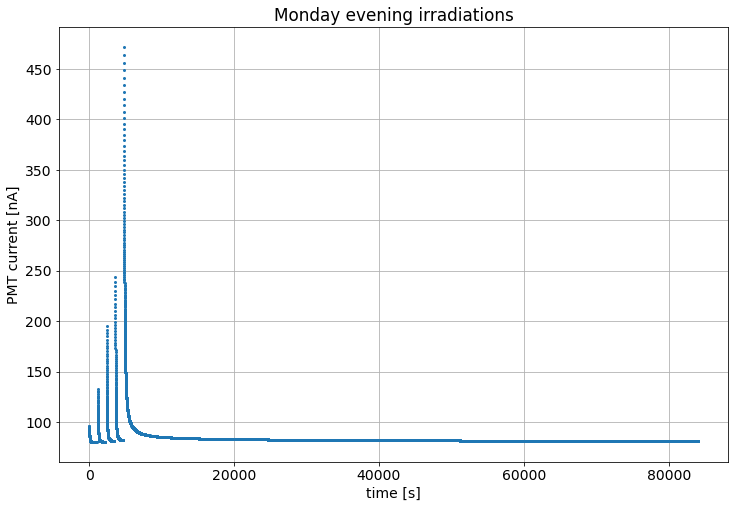

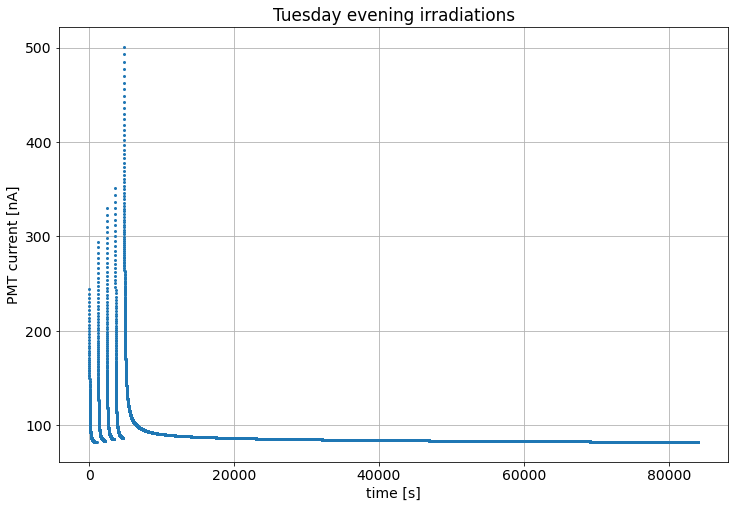

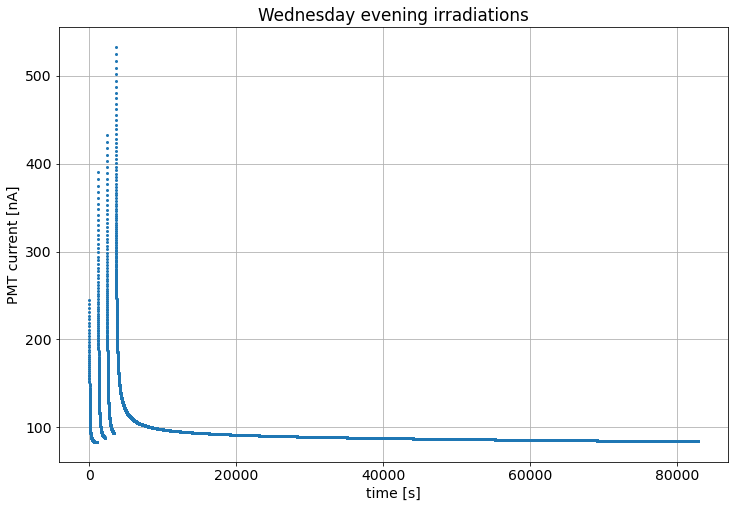

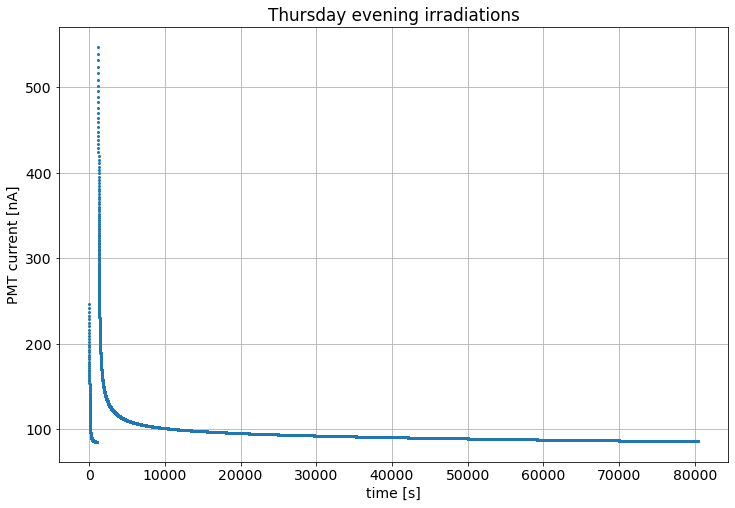

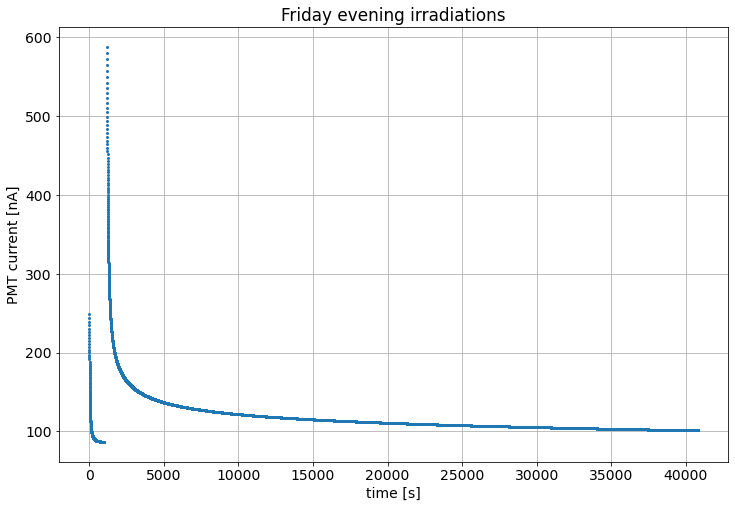

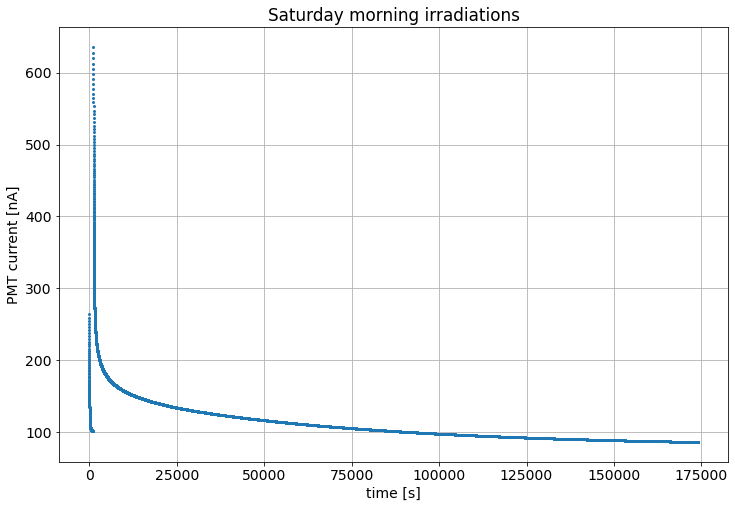

In [6]:
PMT.clear()

# Monday evening
# irradiation step 1
PMT.load_measure('20210104_200000', Ti[0], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = Tm+np.arange(1000, dtype=float)
# irradiation step 2
PMT.load_measure('20210104_202000', Ti[1], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 20*60+Tm+np.arange(1000, dtype=float)
# irradiation step 3
PMT.load_measure('20210104_204000', Ti[2], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 40*60+Tm+np.arange(1000, dtype=float)
# irradiation step 4
PMT.load_measure('20210104_210000', Ti[3], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 60*60+Tm+np.arange(1000, dtype=float)
# last irradiation
PMT.load_measure('20210104_212000', Ti[9], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 80*60+Tm+np.arange(22*3600, dtype=float)

# Tuesday evening
# irradiation step 1
PMT.load_measure('20210105_200000', Ti[3], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 24*3600+Tm+np.arange(1000, dtype=float)
# irradiation step 2
PMT.load_measure('20210105_202000', Ti[4], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 24*3600+20*60+Tm+np.arange(1000, dtype=float)
# irradiation step 3
PMT.load_measure('20210105_204000', Ti[5], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 24*3600+40*60+Tm+np.arange(1000, dtype=float)
# irradiation step 4
PMT.load_measure('20210105_210000', Ti[6], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 24*3600+60*60+Tm+np.arange(1000, dtype=float)
# last irradiation
PMT.load_measure('20210105_212000', Ti[10], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 24*3600+80*60+Tm+np.arange(22*3600, dtype=float)

# Wednesday evening
# irradiation step 1
PMT.load_measure('20210106_200000', Ti[3], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 2*24*3600+Tm+np.arange(1000, dtype=float)
# irradiation step 2
PMT.load_measure('20210106_202000', Ti[7], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 2*24*3600+20*60+Tm+np.arange(1000, dtype=float)
# irradiation step 3
PMT.load_measure('20210106_204000', Ti[8], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 2*24*3600+40*60+Tm+np.arange(1000, dtype=float)
# last irradiation
PMT.load_measure('20210106_210000', Ti[11], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 2*24*3600+60*60+Tm+np.arange(22*3600, dtype=float)

# Thursday evening
# irradiation step 1
PMT.load_measure('20210107_200000', Ti[3], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 3*24*3600+Tm+np.arange(1000, dtype=float)
# last irradiation
PMT.load_measure('20210107_202000', Ti[12], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 3*24*3600+20*60+Tm+np.arange(22*3600, dtype=float)

# Friday evening
# irradiation step 1
PMT.load_measure('20210108_200000', Ti[3], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 4*24*3600+Tm+np.arange(1000, dtype=float)
# last irradiation
PMT.load_measure('20210108_202000', Ti[13], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 4*24*3600+20*60+Tm+np.arange(11*3600, dtype=float)

# Saturday morning
# irradiation step 1
PMT.load_measure('20210109_080000', Ti[3], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 4*24*3600+12*3600+Tm+np.arange(1000, dtype=float)
# last irradiation
PMT.load_measure('20210109_082000', Ti[14], Tm, phi_coll, 0.)
PMT.data[-1][-1]['t'] = 4*24*3600+12*3600+20*60+Tm+np.arange(48*3600, dtype=float)

# simulate the irradiations
PMT.simulate(tau, n, Ib=PMT_Ib)

# plot the simulated measurements, day by day
log_plot = False
plt.figure(figsize=(12, 8))
if log_plot:
    plt.semilogx()
else:
    plt.plot()
t = PMT.get_time(active=[0, 1, 2, 3, 4])
plt.plot(t-t[0]+Tm, PMT.get_data('s', 't', active=[0, 1, 2, 3, 4]), '.', ms=4)
plt.grid(True, which='both')
plt.title('Monday evening irradiations')
plt.xlabel('time [s]')
plt.ylabel('PMT current [nA]')

plt.figure(figsize=(12, 8))
if log_plot:
    plt.semilogx()
else:
    plt.plot()
t = PMT.get_time(active=[5, 6, 7, 8, 9])
plt.plot(t-t[0]+Tm, PMT.get_data('s', 't', active=[5, 6, 7, 8, 9]), '.', ms=4)
plt.grid(True, which='both')
plt.title('Tuesday evening irradiations')
plt.xlabel('time [s]')
plt.ylabel('PMT current [nA]')

plt.figure(figsize=(12, 8))
if log_plot:
    plt.semilogx()
else:
    plt.plot()
t = PMT.get_time(active=[10, 11, 12, 13])
plt.plot(t-t[0]+Tm, PMT.get_data('s', 't', active=[10, 11, 12, 13]), '.', ms=4)
plt.grid(True, which='both')
plt.title('Wednesday evening irradiations')
plt.xlabel('time [s]')
plt.ylabel('PMT current [nA]')

plt.figure(figsize=(12, 8))
if log_plot:
    plt.semilogx()
else:
    plt.plot()
t = PMT.get_time(active=[14, 15])
plt.plot(t-t[0]+Tm, PMT.get_data('s', 't', active=[14, 15]), '.', ms=4)
plt.grid(True, which='both')
plt.title('Thursday evening irradiations')
plt.xlabel('time [s]')
plt.ylabel('PMT current [nA]')

plt.figure(figsize=(12, 8))
if log_plot:
    plt.semilogx()
else:
    plt.plot()
t = PMT.get_time(active=[16, 17])
plt.plot(t-t[0]+Tm, PMT.get_data('s', 't', active=[16, 17]), '.', ms=4)
plt.grid(True, which='both')
plt.title('Friday evening irradiations')
plt.xlabel('time [s]')
plt.ylabel('PMT current [nA]')

plt.figure(figsize=(12, 8))
if log_plot:
    plt.semilogx()
else:
    plt.plot()
t = PMT.get_time(active=[18, 19])
plt.plot(t-t[0]+Tm, PMT.get_data('s', 't', active=[18, 19]), '.', ms=4)
plt.grid(True, which='both')
plt.title('Saturday morning irradiations')
plt.xlabel('time [s]')
plt.ylabel('PMT current [nA]')


## Final remarks

To get most out of the new irradiation campaign we must keep in mind the following things.

* The predictions of the PMT measured currents are done using the information available from the analysis of the J2 crystal used in the previous campaign.

* The new crystal may have a different behaviour, thus we should characterize it extensively with illumination runs in order to find the number of active trap species, their mean lifetimes, and their charge carrier capture rates.

* The illumination level should be such that the scintillation light measured by the SDD cells during the illumination is roughtly equal to the expected scintillation from the proton flux at the facility.

* The durations of the illuminations should span a larger range, and they should be more than  the ones used for the irradiation campaign.

* The same characterization should be performed after the irradiation campaign.

These things are a necessary, even though not necessarily sufficient, conditions to be able to analyze correctly the data acquired during the campaign.
